<a href="https://colab.research.google.com/github/Ayubbett/Moringa-school-Week-8-Independent-Project/blob/main/Moringa_Data_Science_Core_W8_Independent_Project_2021_11_AYUB_BETT_Python_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FACTORS AFFECTING HYPOTHYROID**

**Assessment Question**

Nairobi Hospital conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. Use the healthcare datasets provided to accomplish the following:

Build a model that determines whether or not the patient's symptoms indicate that the patient has hypothyroid.

**1. Defining the Question**

**a) Specifying the Question**

The Nairobi Hospital collected data about the symptoms patients who went to the hospitals had and were to be examined whether they had hypothyroidism. Hypothyroidism also called underactive thyroid is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

They want to know whather specific symptoms had major weight to a patient being diagnosed with hypothyroidism.

**b) Defining the Metric for Success**

We are going to build models majorly using the tree based algorithm and support vector machines and compare among the models which yielded a higher accuracy. For our research to be considered a success we should have atleast 80 percent accuracy level.

**c) Understanding the context**

Hypothyroidism also called underactive thyroid, is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones. Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease. Accurate thyroid function tests are available to diagnose hypothyroidism.

The signs and symptoms of hypothyroidism vary, depending on the severity of the hormone deficiency. Problems tend to develop slowly, often over a number of years. At first, you may barely notice the symptoms of hypothyroidism, such as fatigue and weight gain. Or you may simply attribute them to getting older. But as your metabolism continues to slow, you may develop more-obvious problems. So from this information we are going to build a model that gives us the best symptoms that lead to hypothyroidism.

**d) Recording the Experimental Design**

Below is the expected flow of the model building:

*   Load the dataset.
*   Find and deal with outliers, anomalies, and missing data within the dataset.

*   Perform univariate and bivariate analysis while recording our observation.
*   Perform analysis using decision tree classifier;

*   Optimise using any of the following Random Forest classifier, Adaptive Boosting(Adaboost) or Gradient boosting.
*   Use Support Vector Machine (SVM) to build a machine and utilise the available kernel ie Linear, polynomial and Radial basic Function(Rbf)

*   Decide on the best model to use for prediction.
*   Give conclusion and reccommendation from the results.











**Data relevance / Appropriateness of Data**

Below is the explanation of the column names

*   Age - Age of the correspondent
*   Sex - Gender of the correspondent

*   on_thyroxine
*   query_on_thyroxine

*   on_antithyroid_medicationthyroid_surgery
*   query_hypothyroid

*   pregnant - whether the correspondent is pregnant or not
*   sick - Whether the correspondent is sick or not

*   tumor
*   lithium

*   goitre
*   TSH_measured

*   TSH
*   T3_measured

*   T3
*   TT4_measured

*   TT4















**Data Exploration**

**Importing Libraries**

In [1]:
#Importing libraries we will use for data manipulation and visualization
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

**Reading the Data**

In [2]:
#Reading in the data
thy_df = pd.read_csv('hypothyroid.csv')

**Data Exploration**

In [3]:
#Checking the top five rows of the dataset
thy_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [4]:
#Checking the bottom five entries
thy_df.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [5]:
#Checking the shape of the dataset
thy_df.shape

(3163, 26)

**Data Cleaning**

**1) Anomalies**

In [ ]:
#By checking at the unique values for each column we find that there are ? marks in the dataset
#check for anomalies 
for i in thy_df.columns:
  print(thy_df[i].unique())
  print('\n')

['hypothyroid' 'negative']


['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' '?' '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']


['M' 'F' '?']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['f' 't']


['y' 'n']


['30' '145' '0' '430' '7.30' '138' '7.70' '21' '92' '48' '36' '15' '15.30'
 '25' '61' '28' '170' '54' '216' '56' '71' '46' '70' '34' '53' '9.40'
 '126' '10' '530' '35' '65' '57' '125' '23' '80' '117' '49' '66' '8.20'
 '150' '?' '18' '165' '164' '24' '90' '77' '19' '58' '100' '213' '17'
 '235' '153' '13' '31' '109' '260' '43' '12' '11' '55' '6

In [6]:
#Removing the ? found in the rows
thy_df.replace('?', np.nan, inplace = True)

2) **Missing values**

In [7]:
#Checking for null values in our dataset
thy_df.isnull().sum()

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

Column TBG Has more than 2900 missing values which accounts for to more than three quarters of the rows so we are going to drop the column and drop the null values from the other columns.

In [8]:
#Dropping TBG column
thy_df.drop(['TBG'], axis = 1, inplace=True)

In [9]:
#Dropping null values
#We notice we have a few missing values so we drop them.
thy_df.dropna(inplace = True)

In [10]:
#Checking for null values in our dataset
thy_df.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64

We have no null values anymore

**3) Duplicated Values**

In [11]:
#Checking if there is any duplicated entries
thy_df.duplicated().any()

True

In [12]:
#We notice that we have  duplicated entries so we drop them
thy_df.drop_duplicates(inplace=True)
thy_df.duplicated().sum()

0

**4) Column datatypes**

In [13]:
#Checking the columns respective datatypes
thy_df.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
dtype: object

A few of our numeric columns are classified as objects lets change that to integers and floats.

In [14]:
thy_df['age'] = thy_df['age'].astype(str).astype(int) 

In [15]:
thy_df['FTI'] = thy_df['FTI'].astype(str).astype(float)
thy_df['T4U'] = thy_df['T4U'].astype(str).astype(float)
thy_df['TT4'] = thy_df['TT4'].astype(str).astype(float)
thy_df['T3'] = thy_df['T3'].astype(str).astype(float)
thy_df['TSH'] = thy_df['TSH'].astype(str).astype(float)

Our columns are now in the required  datatypes

**5) Outliers**

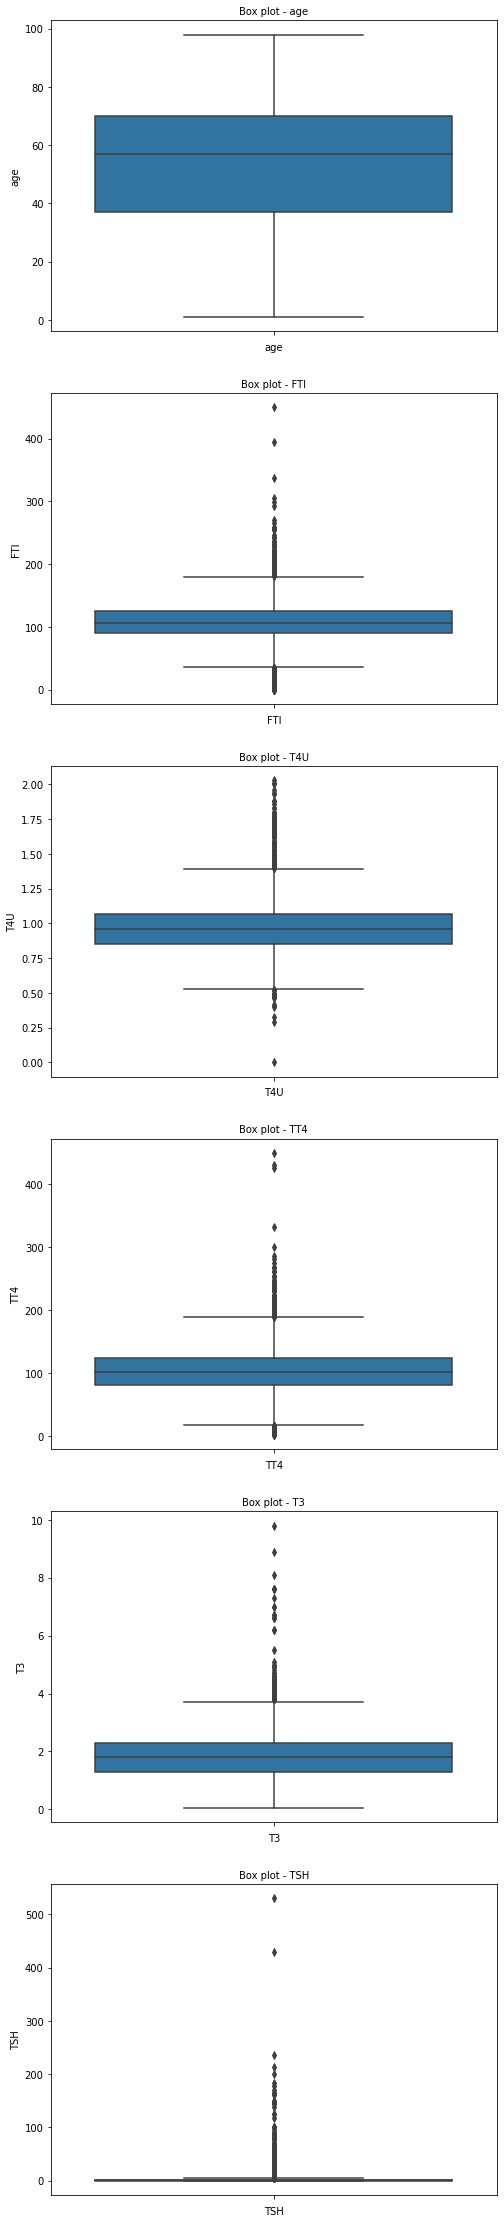

In [17]:
#Checking for outliers in the numeric columns
#Plotting boxplots to detect outliers in the various columns


col_names = ['age', 'FTI', 'T4U', 'TT4', 'T3', 'TSH']

fig,ax = plt.subplots(len(col_names),figsize=(8,40))
for i , col_val in enumerate(col_names):
  sns.boxplot(y=thy_df[col_val],ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize =10)
  ax[i].set_xlabel(col_val,fontsize=10)
plt.show()

In [18]:
#Dropping columns with oulier values
# dealing with outliers

# quantiles
Q1 = thy_df.quantile(0.25)
Q3 = thy_df.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
df = thy_df[~((thy_df < (Q1 - 1.5 * IQR)) | (thy_df > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(df.shape)

# Printing the shape of our old dataset
print(thy_df.shape)

(1446, 25)
(1946, 25)


In [19]:
#Checking our target column unique values
# Printing the unique values of our old dataset
print(thy_df['status'].unique())

['hypothyroid' 'negative']


In [20]:
# Printing the unique values of our new dataset
print(df['status'].unique())

['negative']


From the above output we notice that by dropping outliers we will loose the number of patients who have hypothyroid, so we remain with them for the sake of the project.

# **A) EXPLORATORY DATA ANALYSIS**

**UNIVARIATE ANALYSIS**

In [21]:
#Checking the statistical distribution of the data
thy_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,53.584789,5.957256,1.918911,107.246300,0.987744,110.140956
std,19.258577,24.676600,0.955347,44.081825,0.230405,40.324629
min,1.000000,0.000000,0.050000,2.000000,0.000000,0.000000
25%,37.000000,0.000000,1.300000,82.000000,0.852500,90.000000
50%,57.000000,0.700000,1.800000,103.000000,0.960000,107.000000
75%,70.000000,2.200000,2.300000,125.000000,1.070000,126.000000
max,98.000000,530.000000,9.800000,450.000000,2.030000,450.000000


In [22]:
thy_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

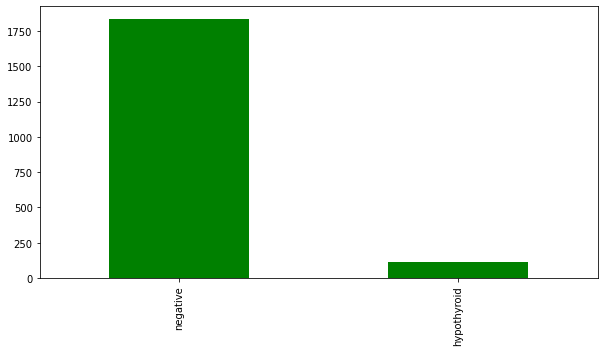

In [24]:
#Value counts of those diagnosed 
plt.figure(figsize = (10,5))
thy_df['status'].value_counts().plot(kind = 'bar', color = 'green')

We note that majority of our correspondents are negative with only a few who are positive.

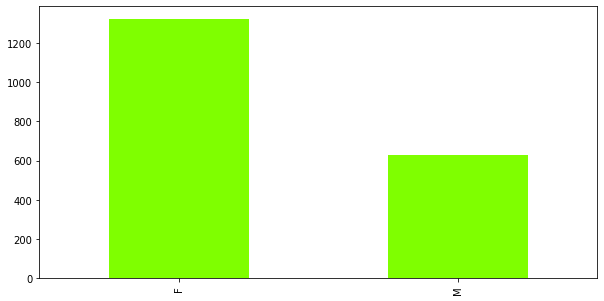

In [25]:
plt.figure(figsize = (10,5))
thy_df['sex'].value_counts().plot(kind = 'bar', color = 'Chartreuse')

Majority of the correspondents are female.

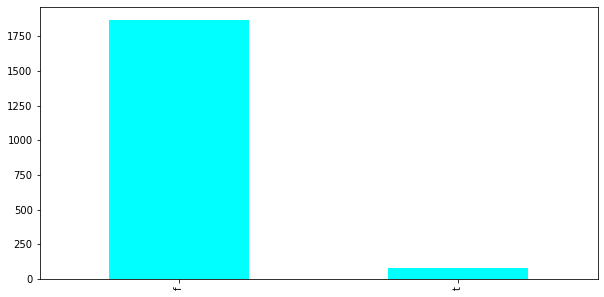

In [26]:
plt.figure(figsize = (10,5))
thy_df['sick'].value_counts().plot(kind = 'bar', color = 'Cyan')

Majority of the correspondents were not sick.

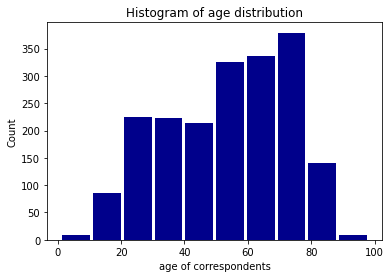

In [27]:
#Plotting histograms of individual age column to see their distribution
#plotting  Histogram
x = thy_df['age']
num_bins = 10

plt.hist(x, bins=10, histtype='bar', rwidth=0.9, color = 'DarkBlue')

plt.xlabel("age of correspondents")
plt.ylabel("Count")
plt.title('Histogram of age distribution') 
plt.show()

Majority of the correspomdents were between 50 years and 80 years.

**Bivariate Analysis**

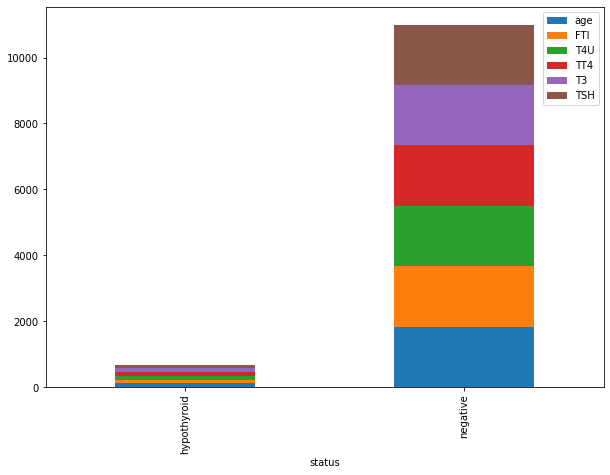

In [28]:
# plotting a stacked bar graph of number of bedrooms against various features

x= thy_df[['status', 'age', 'FTI', 'T4U', 'TT4', 'T3', 'TSH']]
y= x.set_index('status')
z=y.groupby('status').count()


z.plot.bar(stacked=True, figsize = [10,7])

The people who were negatively diagnosed had the most accumulation of the diagnosis.

In [29]:
#separating the numerical columns then get their correlation.
col_names = ['age', 'FTI', 'T4U', 'TT4', 'T3', 'TSH']
df_corr = thy_df[col_names]

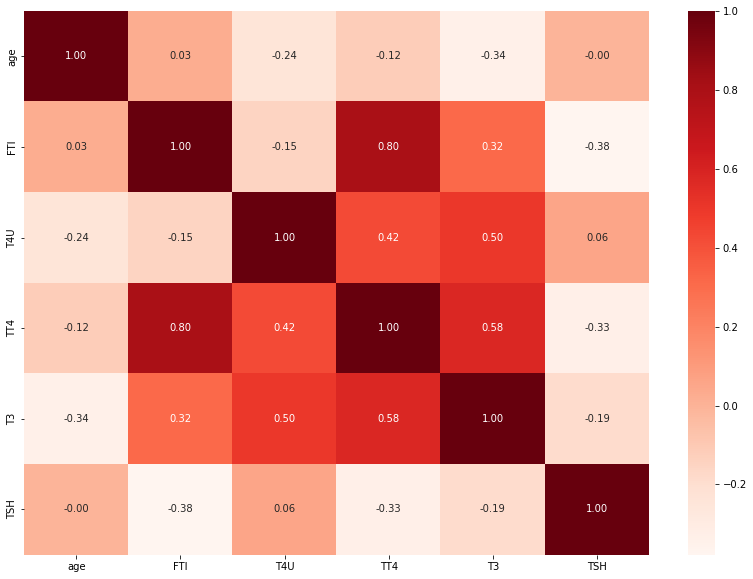

In [ ]:
#Plotting a heat map to show correlation between the numerical variables
plt.figure(figsize=(14,10))
sns.heatmap(df_corr.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()



1.   There is a very strong correlation between FTI and TT4.
2.   Similarly there is a moderate correlation between T4U and T3.

3.   There is a moderate correlation between T3 and TT4





 
 

# **DECISION TREE CLASSIFIER**

**1) Decision Tree with no optimisation.**

We notice that majority of the column variables are categorical so we label encode.

In [30]:
thy_df.head(2)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n


In [31]:
# Import label encoder
from sklearn import preprocessing
 
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in column 'species'.
thy_df['status']= label_encoder.fit_transform(thy_df['status'])
thy_df['sex']= label_encoder.fit_transform(thy_df['sex'])
thy_df['on_thyroxine']= label_encoder.fit_transform(thy_df['on_thyroxine'])
thy_df['query_on_thyroxine']= label_encoder.fit_transform(thy_df['query_on_thyroxine'])
thy_df['on_antithyroid_medication']= label_encoder.fit_transform(thy_df['on_antithyroid_medication'])
thy_df['thyroid_surgery']= label_encoder.fit_transform(thy_df['thyroid_surgery'])
thy_df['query_hypothyroid']= label_encoder.fit_transform(thy_df['query_hypothyroid'])
thy_df['query_hyperthyroid']= label_encoder.fit_transform(thy_df['query_hyperthyroid'])
thy_df['pregnant']= label_encoder.fit_transform(thy_df['pregnant'])
thy_df['sick']= label_encoder.fit_transform(thy_df['sick'])
thy_df['tumor']= label_encoder.fit_transform(thy_df['tumor'])
thy_df['lithium']= label_encoder.fit_transform(thy_df['lithium'])
thy_df['goitre']= label_encoder.fit_transform(thy_df['goitre'])
thy_df['TSH_measured']= label_encoder.fit_transform(thy_df['TSH_measured'])
thy_df['T3_measured']= label_encoder.fit_transform(thy_df['T3_measured'])
thy_df['TT4_measured']= label_encoder.fit_transform(thy_df['TT4_measured'])
thy_df['T4U_measured']= label_encoder.fit_transform(thy_df['T4U_measured'])
thy_df['FTI_measured']= label_encoder.fit_transform(thy_df['FTI_measured'])
thy_df['TBG_measured']= label_encoder.fit_transform(thy_df['TBG_measured'])

In [32]:
thy_df.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72,1,0,0,0,0,0,0,0,0,0,0,0,0,30.0,0,0.6,0,15.0,0,1.48,0,10.0,0
1,0,15,0,1,0,0,0,0,0,0,0,0,0,0,0,145.0,0,1.7,0,19.0,0,1.13,0,17.0,0
2,0,24,1,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0.2,0,4.0,0,1.00,0,0.0,0
3,0,24,0,0,0,0,0,0,0,0,0,0,0,0,0,430.0,0,0.4,0,6.0,0,1.04,0,6.0,0
4,0,77,1,0,0,0,0,0,0,0,0,0,0,0,0,7.3,0,1.2,0,57.0,0,1.28,0,44.0,0


In [33]:
thy_df.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured'],
      dtype='object')

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Splitting the feature set from the target variable
# We want to predict if someone has hypothyroid, so let's use that column as our Y 
y = thy_df['status'].values

test_features = ['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# We are going to use all the features then later drop the less usefull ones.
X = thy_df[test_features].values

# Train using 80% of the data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [35]:
# Create a decision tree classifier

clf = DecisionTreeClassifier()

# Train it on our training set.
clf_class = clf.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred = clf_class.predict(X_test)


from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 98.8013698630137


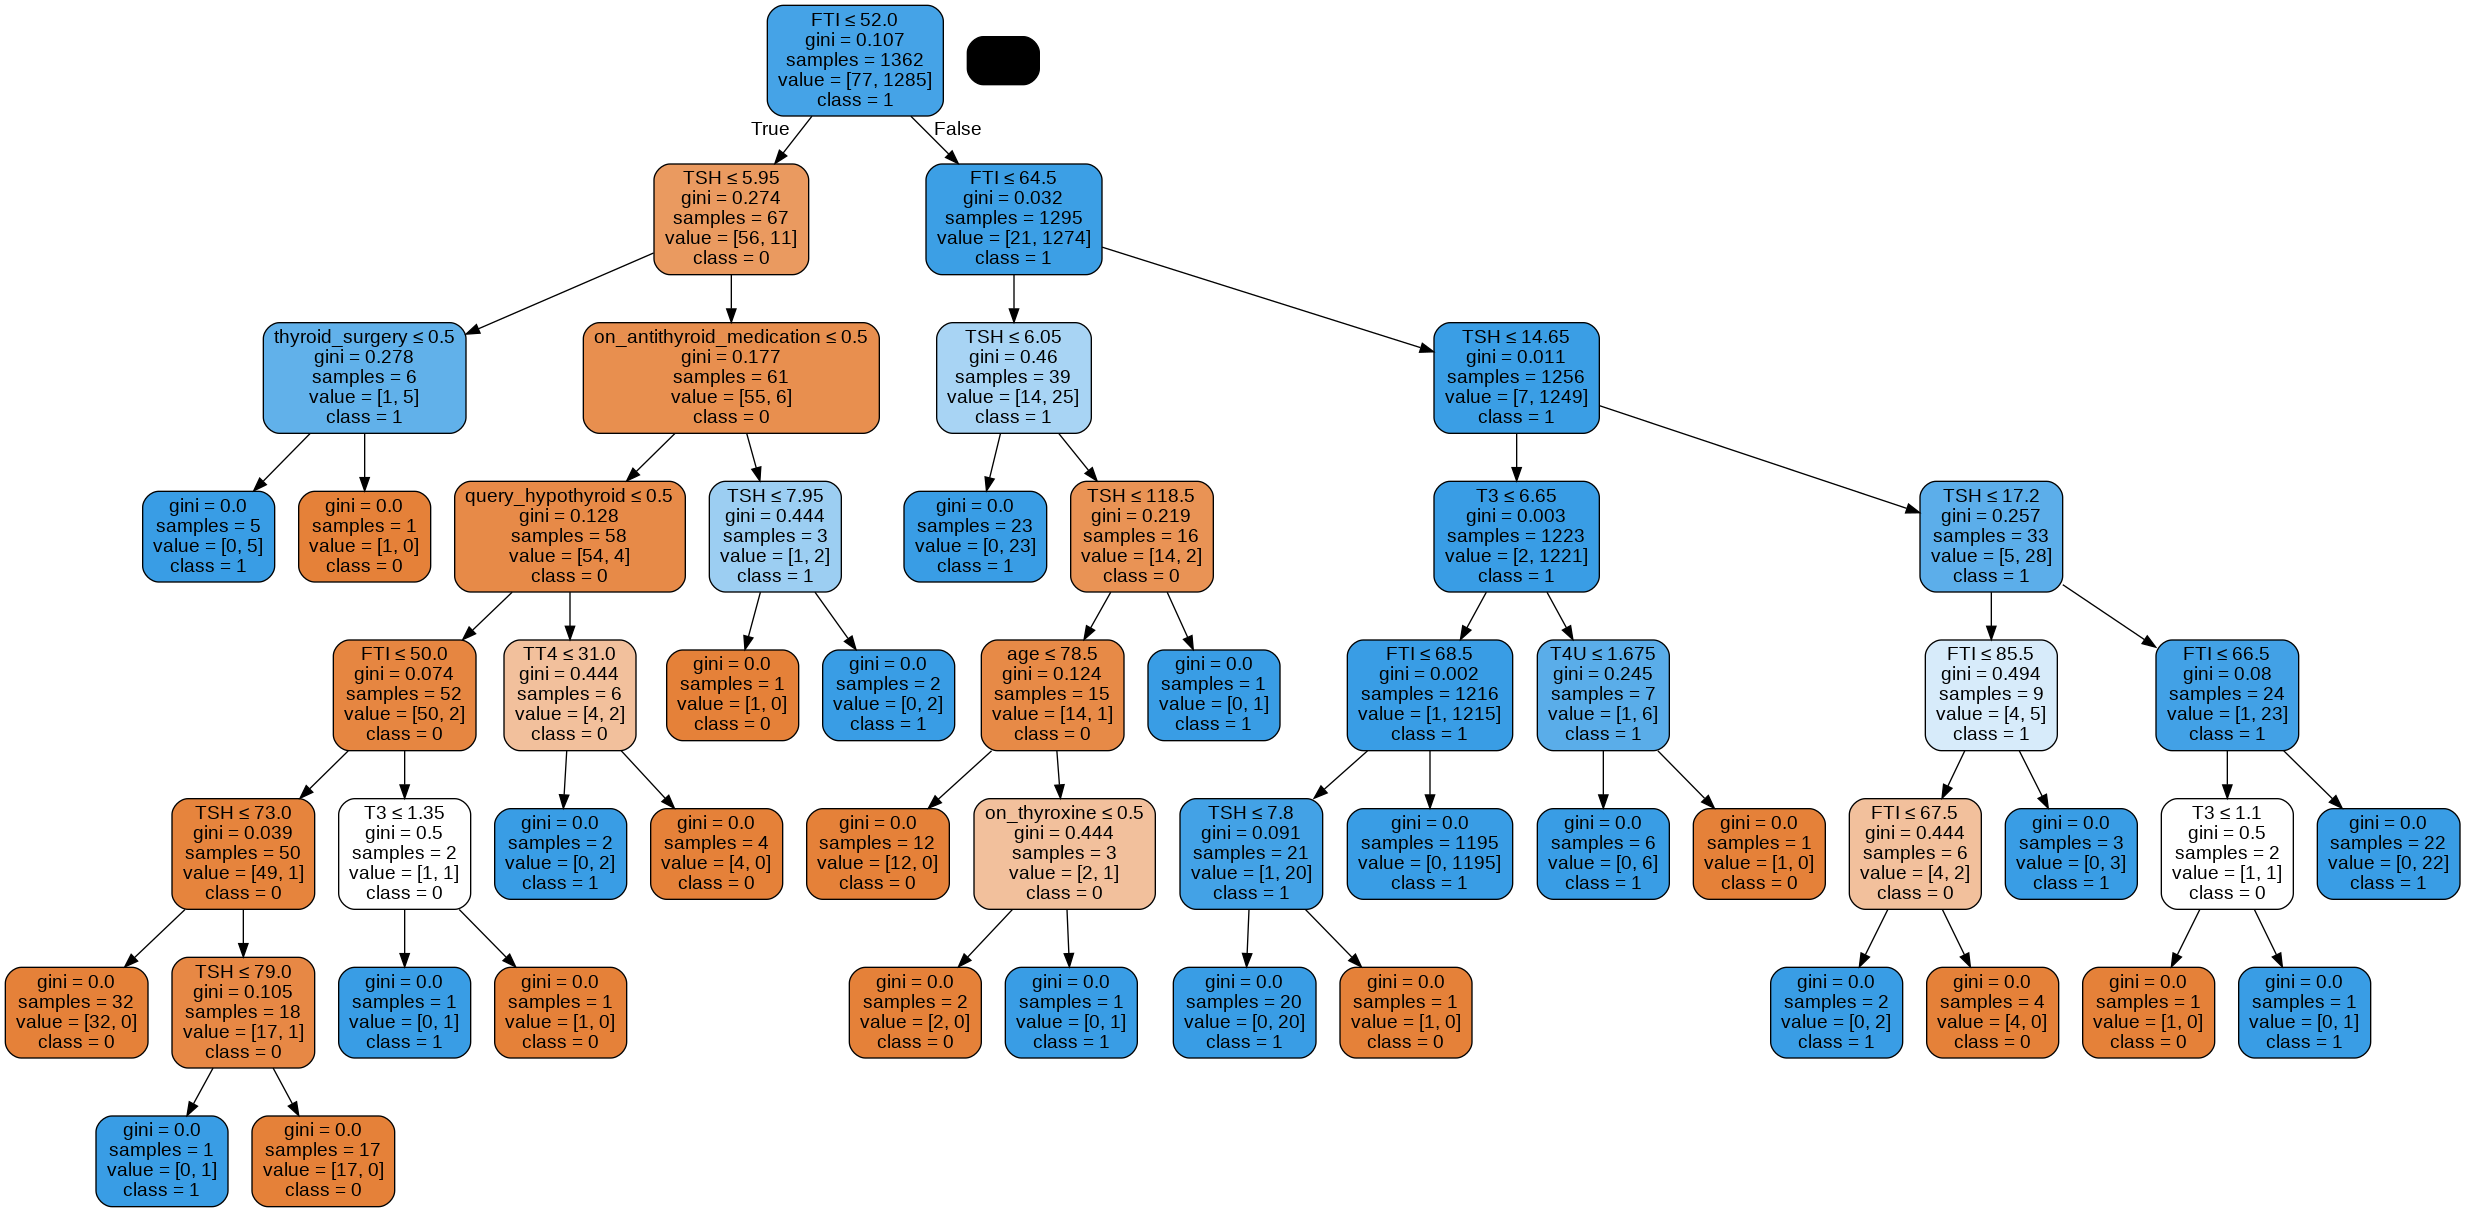

In [36]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf_class, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

**2) Using a random Forest**

In [37]:
# Import the model
from sklearn.ensemble import RandomForestClassifier

# The random_state variable is here to guarantee that we all see the same numbers.
# Note that we can provide the same parameters as in the decision tree, such as 
# min_samples_split or max_depth


forest = RandomForestClassifier(n_estimators=100, random_state=42, min_samples_split = 20, max_depth=5)

forest = forest.fit(X_train, y_train)

# Predict based on the model we've trained
y_pred_forest = forest.predict(X_test)

In [38]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_forest)*100)

Accuracy: 98.63013698630137


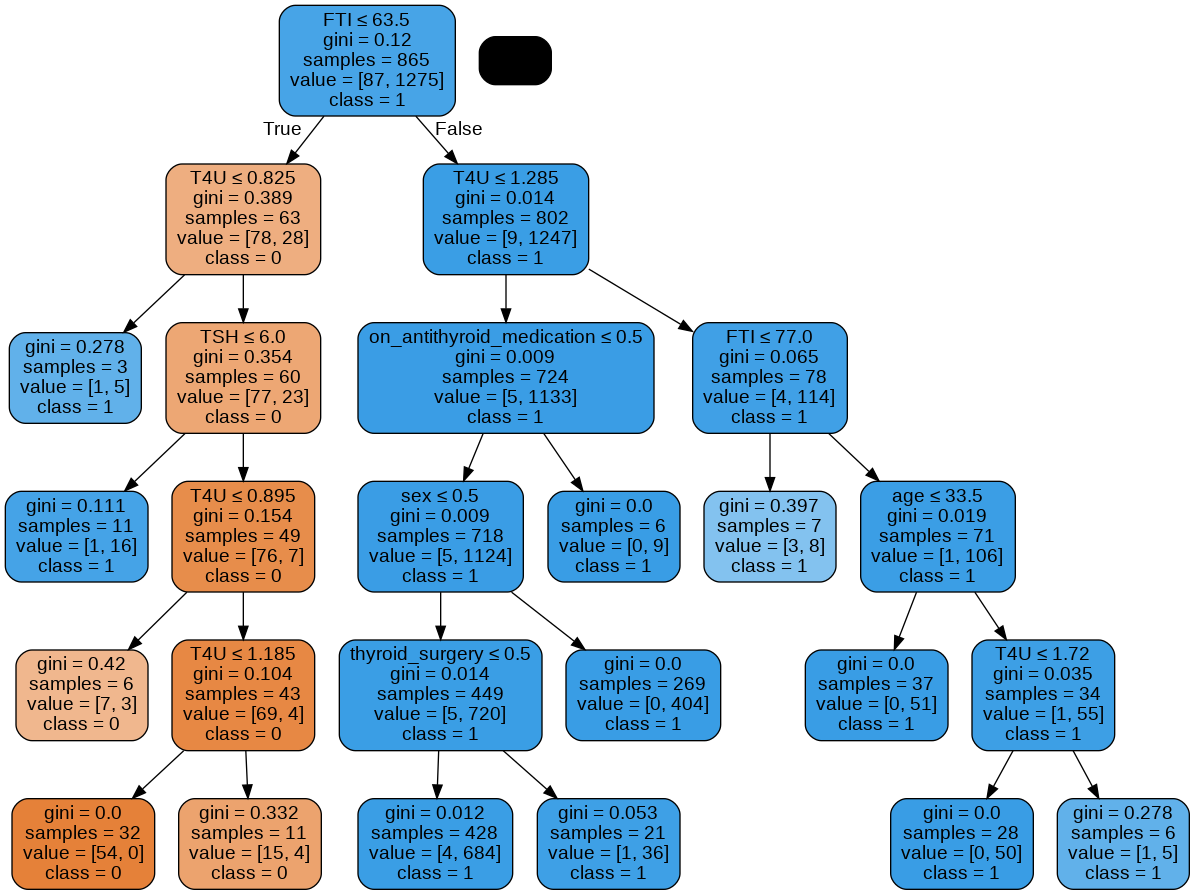

In [39]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
# pick a specific tree from the forest
tree = forest.estimators_[50]

export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = test_features,class_names=['0', '1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('hypothyroid.png')
Image(graph.create_png())

In [40]:
# Get numerical feature importances
importances = list(tree.feature_importances_)

# We now use some Python magic to connect each feature with its importance
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(test_features, importances)]

print(feature_importances) #this already has all the information we need, but it can be tricky to see when there are too many features.
print()

# Nice to have: We can sort the values in descending order, since we care about the most important features first.
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

[('age', 0.0), ('sex', 0.0), ('on_thyroxine', 0.0), ('query_on_thyroxine', 0.0), ('on_antithyroid_medication', 0.0), ('thyroid_surgery', 0.0), ('query_hypothyroid', 0.0), ('query_hyperthyroid', 0.0), ('pregnant', 0.0), ('sick', 0.0), ('tumor', 0.0), ('lithium', 0.0), ('goitre', 0.0), ('TSH_measured', 0.0), ('TSH', 0.16), ('T3_measured', 0.0), ('T3', 0.0), ('TT4_measured', 0.0), ('TT4', 0.0), ('T4U_measured', 0.0), ('T4U', 0.05), ('FTI_measured', 0.0), ('FTI', 0.79), ('TBG_measured', 0.0)]

Variable: FTI                  Importance: 0.79
Variable: TSH                  Importance: 0.16
Variable: T4U                  Importance: 0.05
Variable: age                  Importance: 0.0
Variable: sex                  Importance: 0.0
Variable: on_thyroxine         Importance: 0.0
Variable: query_on_thyroxine   Importance: 0.0
Variable: on_antithyroid_medication Importance: 0.0
Variable: thyroid_surgery      Importance: 0.0
Variable: query_hypothyroid    Importance: 0.0
Variable: query_hyperthyroi

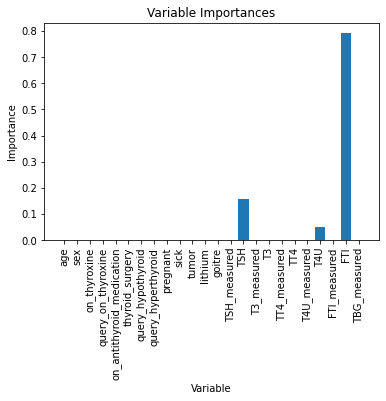

In [41]:
# Import matplotlib for plotting 
import matplotlib.pyplot as plt

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, test_features, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

From the above plot we notice that themost influencial feature are TSH, T4U and FTI. Also we notice that we the rest of the features affect close to nothing in terms of affecting hypothyroid.

**3) Ada boost classifier**

In [42]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         )
# Train Adaboost Classifer
model = abc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred_ada = model.predict(X_test)

In [ ]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_ada)*100)

Accuracy: 98.45890410958904


**4) Gradient Boosting**

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
#target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 5)
gbc = gbc.fit(X_train, y_train)
y_pred_gbc = gbc.predict(X_test)

In [44]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for gradient boosting :",metrics.accuracy_score(y_test, y_pred_gbc)*100)

Accuracy for gradient boosting : 98.97260273972603


From the decision three important features we notice that three features are the most important, so we are going to use ADA Boost and Gradient Descent and tune the parameters on the three features.

**ADA BOOST HYPERPARAMETER TUNING.**

In [49]:
#Selecting those three important features and use them on the ADA boot

test_features1 = ['TSH', 'T4U', 'FTI']
X1 = thy_df[test_features1].values

#picking the same target column
y1 = thy_df['status']. values

# Train using 80% of the data.
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)


In [50]:
# Load libraries
from sklearn.ensemble import AdaBoostClassifier

# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         )
# Train Adaboost Classifer
model1 = abc.fit(X1_train, y1_train)

#Predict the response for test dataset
y_pred_adap = model1.predict(X1_test)

In [51]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y1_test, y_pred_adap)*100)

Accuracy: 97.94520547945206


**GRADIENT BOOSTING**

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
#target_number_of_trees = 300

gbc = GradientBoostingClassifier(n_estimators = 300, learning_rate = 0.1, max_depth = 5)
gbc = gbc.fit(X1_train, y1_train)
y_pred_boost = gbc.predict(X1_test)

In [53]:
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy for gradient boosting :",metrics.accuracy_score(y1_test, y_pred_boost)*100)

Accuracy for gradient boosting : 98.28767123287672


We notice that all the three decision tree classifiers they all range above 96 percent prediction.

# **SUPPORT VECTOR MACHINE(SVM)**

**1) Linear Kernel**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


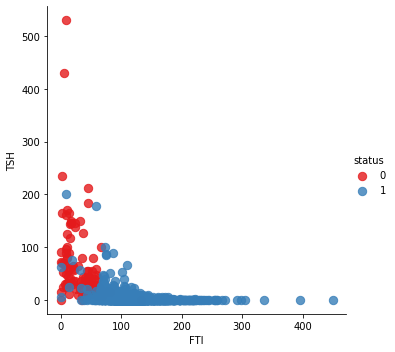

In [59]:
#Lets visualize using the top two most influencial features
# Plotting our desired features
sns.lmplot('FTI','TSH', data=thy_df, hue='status', palette='Set1', fit_reg=False, scatter_kws={"s": 70})

From this plot we can conclude that TSH values takes lower values of FTI and vice versa is true.

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,accuracy_score

In [55]:
#selecting the top three features contributing
# Let's now build the svm model 
cancer_model = SVC(kernel = 'linear')
# Train the model using the training set
cancer_model.fit(X1_train,y_train)

# Predict the response for the test set
y_pred_lin = cancer_model.predict(X1_test)

In [56]:
# Checking the accurancy of the model
model_accuracy = accuracy_score(y1_test,y_pred_lin)
model_accuracy
print(model_accuracy)

0.9845890410958904


In [57]:
from sklearn import metrics
print(metrics.confusion_matrix(y1_test, y_pred_lin))

[[ 31   5]
 [  4 544]]


In [66]:
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
 
# defining parameter range
param_grid = {'C': [-32, 1, 10, 32],
              'kernel': ['linear']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X1_train, y1_train)



Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ................C=-32, kernel=linear;, score=nan total time=   0.0s
[CV 2/5] END ................C=-32, kernel=linear;, score=nan total time=   0.0s
[CV 3/5] END ................C=-32, kernel=linear;, score=nan total time=   0.0s
[CV 4/5] END ................C=-32, kernel=linear;, score=nan total time=   0.0s
[CV 5/5] END ................C=-32, kernel=linear;, score=nan total time=   0.0s
[CV 1/5] END ................C=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 2/5] END ................C=1, kernel=linear;, score=0.978 total time=   0.1s
[CV 3/5] END ................C=1, kernel=linear;, score=0.993 total time=   0.0s
[CV 4/5] END ................C=1, kernel=linear;, score=0.982 total time=   0.1s
[CV 5/5] END ................C=1, kernel=linear;, score=0.978 total time=   0.1s
[CV 1/5] END ...............C=10, kernel=linear;, score=0.967 total time=   0.2s
[CV 2/5] END ...............C=10, kernel=linear;,

In [67]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 1, 'kernel': 'linear'}
SVC(C=1, kernel='linear')


By doing a grid search to find the best penalisation parameter 'c' and since it gives us to be 1 and the default we used above is 1 then we can take the accuray of the linear Kernel to be at its best as 98.46 percent.

**Polynomial Function**

In [62]:
# Building the model 
polyclassifier = SVC(kernel='poly',degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X1_train, y1_train)

SVC(kernel='poly')

In [63]:
# making prediction
y_pred_poly = polyclassifier.predict(X1_test)

# Model Evaluation
print( accuracy_score(y1_test, y_pred_poly))
print(confusion_matrix(y1_test, y_pred_poly))

0.9811643835616438
[[ 32   4]
 [  7 541]]


In [68]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [-32, 1, 10, 32],
              'kernel': ['poly']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ..................C=-32, kernel=poly;, score=nan total time=   0.0s
[CV 2/5] END ..................C=-32, kernel=poly;, score=nan total time=   0.0s
[CV 3/5] END ..................C=-32, kernel=poly;, score=nan total time=   0.0s
[CV 4/5] END ..................C=-32, kernel=poly;, score=nan total time=   0.0s
[CV 5/5] END ..................C=-32, kernel=poly;, score=nan total time=   0.0s
[CV 1/5] END ..................C=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END ..................C=1, kernel=poly;, score=0.971 total time=   0.0s
[CV 3/5] END ..................C=1, kernel=poly;, score=0.993 total time=   0.0s
[CV 4/5] END ..................C=1, kernel=poly;, score=0.963 total time=   0.0s
[CV 5/5] END ..................C=1, kernel=poly;, score=0.974 total time=   0.0s
[CV 1/5] END .................C=10, kernel=poly;, score=0.963 total time=   0.0s
[CV 2/5] END .................C=10, kernel=poly;,

GridSearchCV(estimator=SVC(),
             param_grid={'C': [-32, 1, 10, 32], 'kernel': ['poly']}, verbose=3)

In [69]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 32, 'kernel': 'poly'}
SVC(C=32, kernel='poly')


In [70]:
# Building the model 
polyclassifier = SVC(kernel='poly', C=32, degree=3,gamma='scale')
# Training the model using the training set
polyclassifier.fit(X1_train, y1_train)

SVC(C=32, kernel='poly')

In [71]:
# making prediction
y_pred_poly = polyclassifier.predict(X1_test)

# Model Evaluation
print( accuracy_score(y1_test, y_pred_poly))
print(confusion_matrix(y1_test, y_pred_poly))

0.9828767123287672
[[ 33   3]
 [  7 541]]


Setting our C to 32 doesn't improve our model much as it just classifies one misclassified case correctly.

**Radial Basis Function**

In [64]:
# Building the model 
rbfclassifier = SVC(kernel='rbf')
# Training the model using the training set
rbfclassifier.fit(X1_train, y1_train)

SVC()

In [65]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X1_test)

# Model Evaluation
print( accuracy_score(y1_test, y_pred_rbf))
print(confusion_matrix(y1_test, y_pred_rbf))

0.9794520547945206
[[ 31   5]
 [  7 541]]


In [72]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [-32, 1, 10, 32],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X1_train, y1_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ..........C=-32, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ..........C=-32, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ..........C=-32, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ..........C=-32, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ..........C=-32, gamma=1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END ........C=-32, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END ........C=-32, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 3/5] END ........C=-32, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 4/5] END ........C=-32, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 5/5] END ........C=-32, gamma=0.1, kernel=rbf;, score=nan total time=   0.0s
[CV 1/5] END .......C=-32, gamma=0.01, kernel=rbf;, score=nan total time=   0.0s
[CV 2/5] END .......C=-32, gamma=0.01, kernel=r

GridSearchCV(estimator=SVC(),
             param_grid={'C': [-32, 1, 10, 32],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [73]:
# print best parameter after tuning
print(grid.best_params_)
 
# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 32, 'gamma': 0.001, 'kernel': 'rbf'}
SVC(C=32, gamma=0.001)


In [74]:
# Building the model 
rbfclassifier = SVC(kernel='rbf', C = 32, gamma= 0.001)
# Training the model using the training set
rbfclassifier.fit(X1_train, y1_train)

SVC(C=32, gamma=0.001)

In [75]:
# making prediction
y_pred_rbf = rbfclassifier.predict(X1_test)

# Model Evaluation
print( accuracy_score(y1_test, y_pred_rbf))
print(confusion_matrix(y1_test, y_pred_rbf))

0.9897260273972602
[[ 33   3]
 [  3 545]]


Improving the gamma to 0.001 and C to 32 just correctly classifies two previously misclassified cases.

**CONCLUSION**

From all the models built and optimised, we notice that all had accuracies of more than 95 percent. It can be attributed to the fact that majority of the patients whose records were taken did not have hypothyroid. Alo the fact that only three features had an impact on the prediction.